# Regresión Lineal: Predicción de Precios de Autos

Una tarea bastante común en el contexto de Machine Learning es la predicción de una variable según algunos descriptores. En esta ocasión partiremos de un dataset que involucra ocho variables (algunas numéricas, otras categóricas) y el precio de un automóvil, el cual se desea estimar empleando un modelo de regresión lineal.

El objetivo de este cuaderno es que usted aprenda:
- Algunas maneras de lidiar con descriptores categóricos no-numéricos.
- Uso de la librería Pandas para manejar datos tabulares en formato .csv.
- Uso de la librería Scikit Learn para preprocesamiento y entrenamiento de un modelo de regresión lineal.
- Funcionamiento e implementación del algoritmo Descenso de Gradiente Estocástico para un modelo lineal básico.

Debe completar las celdas vacías y seguir las instrucciones anotadas en el cuaderno.

La fecha límite de entrega es el día **6 de septiembre** y se realizará a través de Bloque Neón.

In [110]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importación de librerías y métodos

In [111]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import sklearn
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [112]:
try: 
  # Colocar la direccion del archivo
  df = pd.read_csv('drive/MyDrive/Semestre8/Machine learning/Tareas/Tarea 1/carDataset/toyota.csv') 
except FileNotFoundError:
  print("Insertar la direccion del archivo")
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   engineSize    6738 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 473.9+ KB


Podemos observar algunas categorías numéricas, y otras de tipo _object_ (string).

In [114]:
categ = ['model','year','transmission','fuelType','engineSize']
str_categ = ['model','transmission','fuelType']
numer = ['price','mileage','tax','mpg']

## Parte 1

A continuación se realizó el ajuste de los datos para un modelo de regresión lineal definido mediante la librería SciKit-Learn. Se observan dos métricas de precisión, en este caso Error Cuadrático Medio (RMSE) y $R^2$ (puede leer más sobre esta métrica en [ScikitLearn: r2_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)). Se le entregarán los dos primeros casos como ejemplo, usted debe implementar los demás a partir de estos primeros.

#### Casos:

- Caso 1: Codificación One-Hot (MinMaxScaler)
- Caso 2: Codificación Ordinal (MinMaxScaler)
- Caso 3: Codificación One-Hot (RobustScaler)
- Caso 4: Codificación Ordinal (RobustScaler)
- Caso 5: Entrenar con un 30% (Codificación Ordinal, MinMaxScaler)
- Caso 6: Entrenar con un 55% (Codificación Ordinal, MinMaxScaler)
- Caso 7: Entrenar con un 80% (Codificación Ordinal, MinMaxScaler)

Analice los resultados.

### Caso 1:

#### Codificación One-Hot

Una de las formas de codificar categorías no numéricas se conoce como _one-hot encoding_, en donde se crea una columna para cada valor distinto que exista en la característica que estamos codificando y, para cada registro, marcar con un 1 la columna a la que pertenezca dicho registro y dejar las demás con 0.

Igualmente, en este caso se realizará un escalamiento de los datos utilizando un `MinMaxScaler`, investigue más sobre esta función en: [ScikitLearn: MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html).

In [139]:
#Encodig
df_ohe = pd.get_dummies(df)
#Transformation & Scale 
scaler = MinMaxScaler()
df_scl_ohe = scaler.fit_transform(df_ohe)
df_scl_ohe = pd.DataFrame(df_scl_ohe, columns = df_ohe.columns)
df_scl_ohe.head()

,year,price,mileage,tax,mpg,engineSize,model_ Auris,model_ Avensis,model_ Aygo,model_ C-HR,model_ Camry,model_ Corolla,model_ GT86,model_ Hilux,model_ IQ,model_ Land Cruiser,model_ PROACE VERSO,model_ Prius,model_ RAV4,model_ Supra,model_ Urban Cruiser,model_ Verso,model_ Verso-S,model_ Yaris,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,0.818182,0.256150,0.138100,0.469027,0.143842,0.444444,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.863636,0.256066,0.106716,0.256637,0.143842,0.444444,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.772727,0.222301,0.157479,0.469027,0.143842,0.444444,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.863636,0.306839,0.084476,0.265487,0.143842,0.444444,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.863636,0.281478,0.208019,0.256637,0.143842,0.444444,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


#### Separación de Datos

In [140]:
#Separation
X = df_scl_ohe.drop(['price'], axis=1)
y = df_scl_ohe['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1999, random_state=22)

In [141]:
#Regression
model_1 = LinearRegression()
model_1.fit(X_train, y_train)
#Evaluation
preds = model_1.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
rs = model_1.score(X_test, y_test)
print(f'RMSE: {round(rmse,3)}')
print(f'R^2: {round(rs,3)}\n')
index = ["RMSE", "R^2"]
comparison = pd.DataFrame(index=index)
comparison["Caso 1"]=[rmse,rs]

RMSE: 0.031
R^2: 0.917



### Caso 2

#### Codificación Ordinal

In [142]:
#Encoding
oe = OrdinalEncoder()
df_oe = df.copy()
df_oe[str_categ] = oe.fit_transform(df_oe[str_categ])
df_oe.head()


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,6.0,2016,16000,1.0,24089,3.0,265,36.2,2.0
1,6.0,2017,15995,1.0,18615,3.0,145,36.2,2.0
2,6.0,2015,13998,1.0,27469,3.0,265,36.2,2.0
3,6.0,2017,18998,1.0,14736,3.0,150,36.2,2.0
4,6.0,2017,17498,1.0,36284,3.0,145,36.2,2.0


In [143]:
#Transformation & Scale 
x = df_oe.values #returns a numpy array
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_scl_oe = pd.DataFrame(x_scaled, columns=df_oe.columns)
df_scl_oe.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,0.352941,0.818182,0.256150,0.333333,0.138100,1.0,0.469027,0.143842,0.444444
1,0.352941,0.863636,0.256066,0.333333,0.106716,1.0,0.256637,0.143842,0.444444
2,0.352941,0.772727,0.222301,0.333333,0.157479,1.0,0.469027,0.143842,0.444444
3,0.352941,0.863636,0.306839,0.333333,0.084476,1.0,0.265487,0.143842,0.444444
4,0.352941,0.863636,0.281478,0.333333,0.208019,1.0,0.256637,0.143842,0.444444


#### Separación de Datos

In [144]:
X = df_scl_oe.drop(['price'], axis=1)
y = df_scl_oe['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

In [145]:
model_2 = LinearRegression()

model_2.fit(X_train, y_train)
preds = model_2.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
rs = model_2.score(X_test, y_test)
print(f'RMSE: {round(rmse,3)}')
print(f'R^2: {round(rs,3)}\n')
comparison["Caso 2"]=[rmse,rs]

RMSE: 0.05
R^2: 0.787



### Caso 3


#### Lectura de datos

In [146]:
#audi  bmw  cclass  focus  hyundi
#merc  skoda  vauxhall  vw  ford
#df = pd.read_csv('carDataset/toyota.csv')
df3 = df.copy() 
df3.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


#### Codificación One-Hot

In [147]:
#Encoding
df_ohe_rb = pd.get_dummies(df3)

In [148]:
#Transformation & Scale 
scaler = RobustScaler()
df_ohe_RB = scaler.fit_transform(df_ohe_rb)
df_ohe_RB = pd.DataFrame(df_ohe_RB, columns = df_ohe.columns)
df_ohe_RB.head()

,year,price,mileage,tax,mpg,engineSize,model_ Auris,model_ Avensis,model_ Aygo,model_ C-HR,model_ Camry,model_ Corolla,model_ GT86,model_ Hilux,model_ IQ,model_ Land Cruiser,model_ PROACE VERSO,model_ Prius,model_ RAV4,model_ Supra,model_ Urban Cruiser,model_ Verso,model_ Verso-S,model_ Yaris,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,-0.5,0.776286,0.257936,0.896552,-1.955882,0.625,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.775541,0.004718,0.068966,-1.955882,0.625,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.0,0.477703,0.414289,0.896552,-1.955882,0.625,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.223415,-0.174718,0.103448,-1.955882,0.625,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.999702,0.822056,0.068966,-1.955882,0.625,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Separación de Datos

In [149]:
#Separation
X = df_ohe_RB.drop(['price'], axis=1)
y = df_ohe_RB['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

In [150]:
#Regression
model_3 = LinearRegression()
model_3.fit(X_train, y_train)
#Evaluation
preds = model_3.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
rs = model_3.score(X_test, y_test)
print(f'RMSE: {round(rmse,3)}')
print(f'R^2: {round(rs,3)}\n')
comparison["Caso 3"]=[rmse,rs]

RMSE: 0.277
R^2: 0.917



### Caso 4

#### Codificación Ordinal
Caso 4: Codificación Ordinal (RobustScaler)

In [151]:
#Encoding
oe_R = OrdinalEncoder()
df_oe_R = df.copy()
df_oe_R[str_categ] = oe_R.fit_transform(df_oe_R[str_categ])
df_oe_R.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,6.0,2016,16000,1.0,24089,3.0,265,36.2,2.0
1,6.0,2017,15995,1.0,18615,3.0,145,36.2,2.0
2,6.0,2015,13998,1.0,27469,3.0,265,36.2,2.0
3,6.0,2017,18998,1.0,14736,3.0,150,36.2,2.0
4,6.0,2017,17498,1.0,36284,3.0,145,36.2,2.0


In [152]:
##Transformation & Scale 
scaler = RobustScaler()
df_oe_RT = scaler.fit_transform(df_oe_R)
print(type(df_oe_RT))
df_oe_RT = pd.DataFrame(df_oe_RT, columns = df_oe_R.columns)
df_oe_RT.head()

<class 'numpy.ndarray'>


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,0.066667,-0.5,0.776286,0.0,0.257936,0.0,0.896552,-1.955882,0.625
1,0.066667,0.0,0.775541,0.0,0.004718,0.0,0.068966,-1.955882,0.625
2,0.066667,-1.0,0.477703,0.0,0.414289,0.0,0.896552,-1.955882,0.625
3,0.066667,0.0,1.223415,0.0,-0.174718,0.0,0.103448,-1.955882,0.625
4,0.066667,0.0,0.999702,0.0,0.822056,0.0,0.068966,-1.955882,0.625


#### Separación de Datos

In [153]:
#Separation
X = df_oe_RT.drop(['price'], axis=1)
y = df_oe_RT['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)
#Regression
model_4 = LinearRegression()
model_4.fit(X_train, y_train)
#Evaluation
rmse = np.sqrt(mean_squared_error(y_test, model_4.predict(X_test)))
rs = model_4.score(X_test, y_test)           
print(f'RMSE: {round(rmse,3)}')
print(f'R^2: {round(rs,3)}\n')
comparison["Caso 4"]=[rmse,rs]


RMSE: 0.444
R^2: 0.787



### Caso 5

#### Codificación Ordinal 
Caso 5: Entrenar con un 30% (Codificación Ordinal, MinMaxScaler)

In [154]:
#Function that make the encodig (ordinal) 
#and the transformation & scale of the data (MinMaxScale)
def ordinal_Mixmax(df,str_categ):
    #Encoding
    oe_M = OrdinalEncoder()
    df_oe_M = df.copy()
    df_oe_M[str_categ] = oe_R.fit_transform(df_oe_R[str_categ])

    #Transformation & Scale 
    scaler = MinMaxScaler()
    df_oe_MT = scaler.fit_transform(df_oe_M)
    df_oe_MT = pd.DataFrame(df_oe_MT, columns = df_oe_M.columns)
    #Return a Data Frame with t&s data
    return df_oe_MT

#### Separación de Datos

In [155]:
#Function that make the separation, regression and evaluation of the model
#Need a DF a train rate
def s_r_e(dfp, r_train):
    X = dfp.drop(['price'], axis=1)
    y = dfp['price']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=(1-r_train), random_state=22)
    #Regression
    model_4 = LinearRegression()
    model_4.fit(X_train, y_train)
    #Evaluation
    rmse = np.sqrt(mean_squared_error(y_test, model_4.predict(X_test)))
    rs = model_4.score(X_test, y_test)   
    results =pd.DataFrame()
    results["RMSE"] = [rmse]
    results["RS"] = [rs]
    #Returns a Data Frame with rsme and R^2 results
    return results

In [156]:
#Make the case
data = ordinal_Mixmax(df,str_categ)
solu=s_r_e(data, 0.3)
display(solu.head())
comparison["Caso 5"]=solu.values[0]

,RMSE,RS
0,0.049182,0.784548


### Caso 6

#### Codificación Ordinal
Entrenar con un 55% (Codificación Ordinal, MinMaxScaler)

In [157]:
#Invoque the function above mentioned
data=ordinal_Mixmax(df,str_categ)

#### Separación de Datos

In [158]:
#Invoque the function above mentioned
solu=s_r_e(data, 0.55)
display(solu.head())
comparison["Caso 6"]=solu.values[0]

,RMSE,RS
0,0.049749,0.784183


### Caso 7

#### Codificación Ordinal
Entrenar con un 80% (Codificación Ordinal, MinMaxScaler)

In [159]:
#Invoque the function above mentioned
data=ordinal_Mixmax(df,str_categ)

#### Separación de Datos

In [160]:
#Invoque the function above mentioned
solu=s_r_e(data, 0.8)
display(solu.head())
comparison["Caso 7"]=solu.values[0]

,RMSE,RS
0,0.050311,0.787472


### Conclusiones

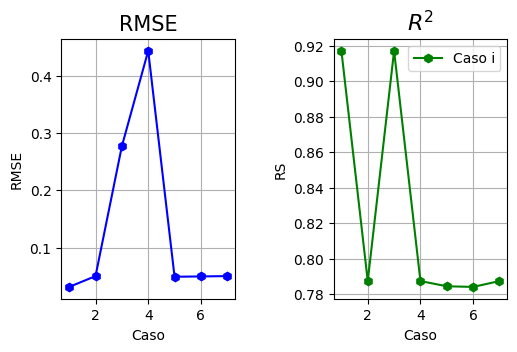

In [161]:
#plt.figure(dpi=(300))
fig, ax= plt.subplots(1, 2)
fig.tight_layout(pad=4.0)
fig.dpi = 100
ax[0].set_title("RMSE", fontsize= 15)
ax[0].set_ylabel("RMSE")
ax[0].set_xlabel("Caso")
ax[0].plot(range(1,8),np.array(comparison.iloc[0][0:]),"-h",color='b')
ax[1].plot(range(1,8),np.array(comparison.iloc[1][0:]),"-h",color='g')
ax[1].set_ylabel("RS")
ax[1].set_xlabel("Caso")
ax[1].set_title(f"$R^2$", fontsize= 16)
ax[1].legend(('Caso i','truco'))
ax[0].grid()
ax[1].grid()
plt.show()

Con base en los valores obtenidos y mostrados en la gráfica, es posible concluir que la mejor representación del modelo (Con el menor RMSE y mejor ajuste $R^2$, mayor valor) es la configuración del caso uno. Es decir, en donde se codifican las variables mediante **One-hot encoding** y se realiza la transformación y escalamiento de MinMax $(x-x_{min})/(x_{max}-x_{min})$. Lo anterior se concluyó tras realizar el siguiente análisis:
- Menor valor de RMSE: Caso 1  ***0.031***
- Mayor valor de $R^2$: Caso 1  ***0.91707***


In [162]:
display(comparison.head())


,Caso 1,Caso 2,Caso 3,Caso 4,Caso 5,Caso 6,Caso 7
RMSE,0.031435,0.050311,0.277235,0.443797,0.049182,0.049749,0.050311
R^2,0.917072,0.787472,0.917064,0.787472,0.784548,0.784183,0.787472


## Parte 2

Ahora usted debe desarrollar su propia implementación del método Descenso de Gradiente estocástico. Para esta ocasión debe utilizar una codificación One-Hot, un RobustScaler y realizar el entrenamiento a partir del 80% de los datos. Al final del entrenamiento, en la lista `errores` se deben tener los valores de la función de error para cada iteración y así poder observar el progreso gráficamente.

In [163]:
df_ohe = pd.get_dummies(df)
scaler = RobustScaler()
df_scl_ohe = scaler.fit_transform(df_ohe)
df_scl_ohe = pd.DataFrame(df_scl_ohe, columns = df_ohe.columns)

X = df_scl_ohe.drop(['price'], axis=1)
y = df_scl_ohe['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

In [164]:
X_train_array = np.c_[np.ones(X_train.values.shape[0]), X_train.values] 
y_train_array = y_train.values
X_test_array = np.c_[np.ones(X_test.values.shape[0]), X_test.values]
y_test_array = y_test.values

#Inicialización de w
w0 = np.random.rand(len(X_train_array[0])) # Inicializar aleatoriamente #
w = w0.copy()
#Selección de par aleatorio
i = np.random.randint(0, len(X_train_array) - 1)
xActual = X_train_array[i]
yActual = y_train_array[i]
#Inicialización de criterio de parada
eps = 1e-8 # Se define un criterio de parada basado en el error en la predicción #
error = float('inf') # Valor inicial, se debe actualizar en cada iteración #
dif = float('inf') # Diferencia entre vectores de pesos w consecutivos #
#Inicialización de valor de la tasa de aprendizaje 
tasa = 0.003# Selección de tasa de aprendizaje #
#Lista para monitorear aprendizaje
errores = [] # Agregar a esta lista los valores de la función de error en cada iteración #

#Ciclo iterativo según algoritmo de descenso de gradiente
while dif > eps:
    #Dot product
    g = np.dot(w, xActual)
    #Error
    error = g - yActual
    errores.append(error)
    #Update of candidates on t
    w = w0 - tasa * error * xActual
    #Infinity norm vector 
    dif = np.linalg.norm(w - w0, ord=np.inf)
    #Update of candidates on t-1
    w0 = w
    #Take random one set to test on t+1
    i = np.random.randint(0, len(X_train_array) - 1)
    xActual = X_train_array[i]
    yActual = y_train_array[i]
print(w)

[ 0.03997665  0.20874053 -0.21434281 -0.12731111 -0.10373879  1.01780533
  0.0777989   0.0453493   0.07893331  0.93584     0.28946428  0.84442199
  0.59037729  0.32253224  0.54877132  1.3591073   0.39545504  0.84068924
  0.16275122  0.79354556  0.75188737  0.03957934  0.71188687 -0.06670509
  0.36674177  0.14430879  0.68081128  0.48958283  0.45080886  0.51871862
  0.64482955  0.48897389]


#### Evaluación de Modelo

In [165]:
y_train_preds = np.zeros(y_train_array.shape)
for i in range(X_train_array.shape[0]):
    y_train_preds[i] = np.dot(w,X_train_array[i])

y_test_preds = np.zeros(y_test_array.shape)
for i in range(X_test_array.shape[0]):
    y_test_preds[i] = np.dot(w,X_test_array[i])
    
r2_train = r2_score(y_train_array, y_train_preds)
r2_test = r2_score(y_test_array, y_test_preds)
print(f'R2 entrenamiento: {round(r2_train,4)}\nR2 prueba: {round(r2_test,4)}')

R2 entrenamiento: 0.8925
R2 prueba: 0.8874


### Gráfica de Resultados

Text(0.5, 1.0, 'Descenso de Gradiente Estocástico')

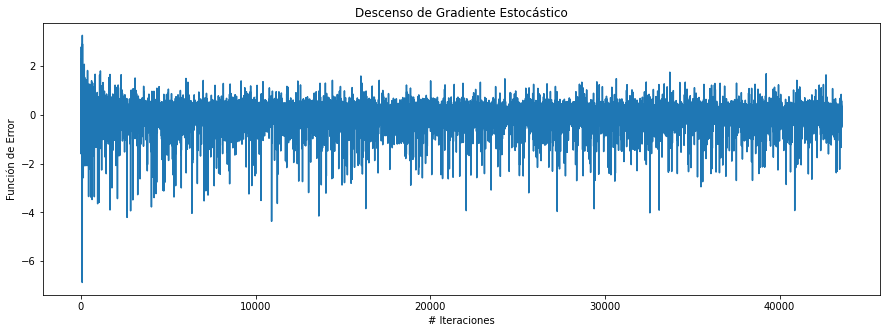

In [166]:
plt.figure(figsize=(15,5))
plt.plot(errores)
plt.xlabel('# Iteraciones')
plt.ylabel('Función de Error')
plt.title('Descenso de Gradiente Estocástico')

### Análisis de sensibilidad sobre la tasa de aprendizaje

In [167]:
# Esto puede tomar 1 o 2 minutos
contador = []  
lr2 = []
valores = np.arange(0.003, 0.02, 0.001)
for ik in valores:
    #Inicialización de w
    w0 = np.random.rand(len(X_train_array[0])) # Inicializar aleatoriamente #
    w = w0.copy()
    #Selección de par aleatorio
    i = np.random.randint(0, len(X_train_array) - 1)
    xActual = X_train_array[i]
    yActual = y_train_array[i]
    #Inicialización de criterio de parada
    eps = 1e-8 # Se define un criterio de parada basado en el error en la predicción #
    error = float('inf') # Valor inicial, se debe actualizar en cada iteración #
    dif = float('inf') # Diferencia entre vectores de pesos w consecutivos #
    #Inicialización de valor de la tasa de aprendizaje 
    tasa = ik # Selección de tasa de aprendizaje #
    #Lista para monitorear aprendizaje
    errores = [] # Agregar a esta lista los valores de la función de error en cada iteración #

    #Ciclo iterativo según algoritmo de descenso de gradiente
    while dif > eps:
        #Dot product
        g = np.dot(w, xActual)
        #Error
        error = g - yActual
        errores.append(error)
        #Update of candidates on t
        w = w0 - tasa * error * xActual
        #Infinity norm vector 
        dif = np.linalg.norm(w - w0, ord=np.inf)
        #Update of candidates on t-1
        w0 = w
        #Take random one set to test on t+1
        i = np.random.randint(0, len(X_train_array) - 1)
        xActual = X_train_array[i]
        yActual = y_train_array[i]
    contador.append(len(errores))
    y_test_preds = np.zeros(y_test_array.shape)
    for j in range(X_test_array.shape[0]):
        y_test_preds[j] = np.dot(w,X_test_array[j])
    lr2.append(r2_score(y_test_array, y_test_preds))

Text(0.5, 1.0, 'Análisis de sensibilidad')

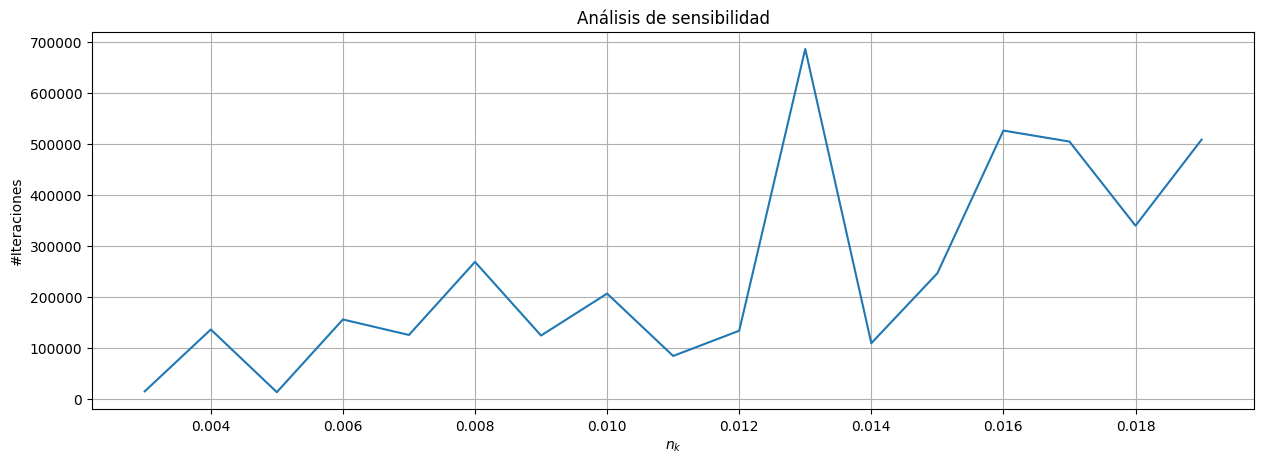

In [168]:
plt.figure(figsize=(15,5),dpi=100)
plt.plot(np.arange(0.003, 0.02, 0.001),contador)
plt.grid()
plt.xlabel(f'$n_k$')
plt.ylabel('#Iteraciones')
plt.title('Análisis de sensibilidad')

Text(0.5, 1.0, 'Análisis de sensibilidad')

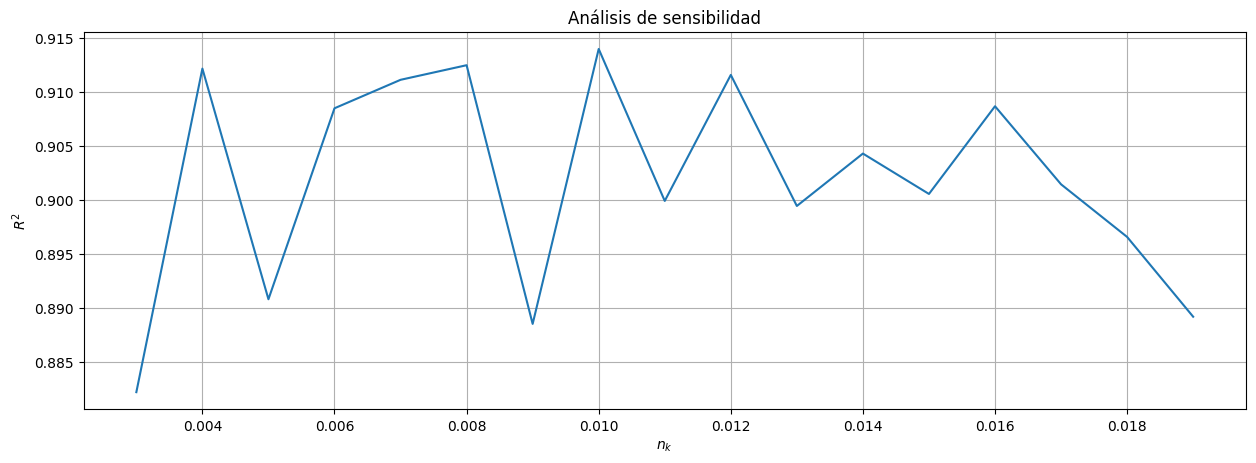

In [169]:
plt.figure(figsize=(15,5),dpi=100)
plt.plot(np.arange(0.003, 0.02, 0.001),lr2)
plt.grid()
plt.xlabel(f'$n_k$')
plt.ylabel(f'$R^2$')
plt.title('Análisis de sensibilidad')

Se puede evidenciar que el valor de la tasa de aprendizaje no produce una tendecia sobre el número requerido de iteraciones para hallar una solución que cumpla con el criterio de parada. Adicionalmente, pasa lo mismo respecto a la métrica de precisión $R^2$. Lo anterior, puede ser producto de la estocásticidad del algoritmo, dado que, iteración por iteración, se cambia el ***X*** inicial empleado para realizar el ajuste.